<a href="https://colab.research.google.com/github/AKSHIT3107/assignment1/blob/main/asst7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset from a URL
url = "https://drive.google.com/uc?id=1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX"
data = pd.read_csv(url)

# Drop the last column (assuming it's the target or label)
X = data.iloc[:, :-1].values

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dataset shape after preprocessing:", X_scaled.shape)

Dataset shape after preprocessing: (5000, 5)


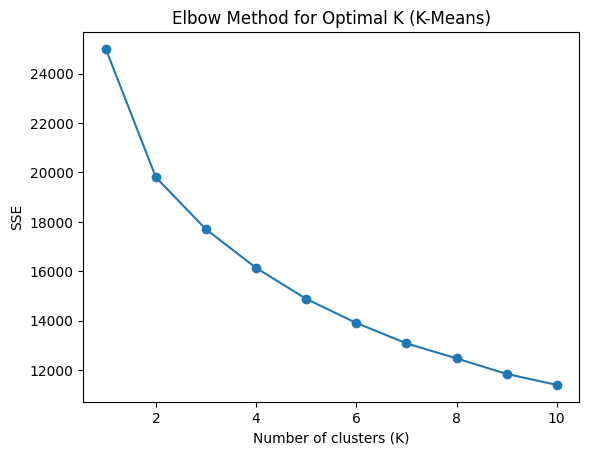

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to initialize centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.permutation(X.shape[0])
    centroids = X[indices[:k]]
    return centroids

# Function to assign clusters based on nearest centroid
def assign_clusters(X, centroids):
    distances = pairwise_distances(X, centroids, metric='euclidean')
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Function to calculate SSE
def calculate_sse(X, clusters, centroids):
    sse = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[clusters == i]
        sse += np.sum((cluster_points - centroids[i]) ** 2)
    return sse

# K-Means algorithm implementation
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        # If centroids don't change, convergence has occurred
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    sse = calculate_sse(X, clusters, centroids)
    return clusters, centroids, sse

# Elbow method to find optimal K
def elbow_method(X, max_k):
    sse_values = []
    for k in range(1, max_k+1):
        _, _, sse = k_means(X, k)
        sse_values.append(sse)

    plt.plot(range(1, max_k+1), sse_values, marker='o')
    plt.title("Elbow Method for Optimal K (K-Means)")
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("SSE")
    plt.show()

# Apply elbow method for K-Means
elbow_method(X_scaled, max_k=10)


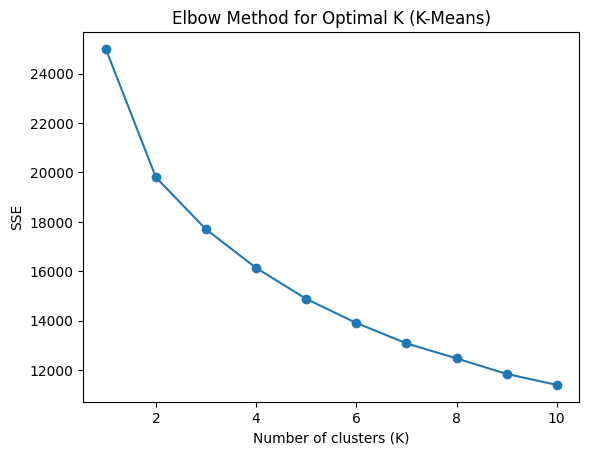

In [3]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Function to initialize centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.permutation(X.shape[0])
    centroids = X[indices[:k]]
    return centroids

# Function to assign clusters based on nearest centroid
def assign_clusters(X, centroids):
    distances = pairwise_distances(X, centroids, metric='euclidean')
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Function to calculate SSE
def calculate_sse(X, clusters, centroids):
    sse = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[clusters == i]
        sse += np.sum((cluster_points - centroids[i]) ** 2)
    return sse

# K-Means algorithm implementation
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)

        # If centroids don't change, convergence has occurred
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    sse = calculate_sse(X, clusters, centroids)
    return clusters, centroids, sse

# Elbow method to find optimal K
def elbow_method(X, max_k):
    sse_values = []
    for k in range(1, max_k+1):
        _, _, sse = k_means(X, k)
        sse_values.append(sse)

    plt.plot(range(1, max_k+1), sse_values, marker='o')
    plt.title("Elbow Method for Optimal K (K-Means)")
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("SSE")
    plt.show()

# Apply elbow method for K-Means
elbow_method(X_scaled, max_k=10)
